### Results obtained by running 25 times each algorithm to compare their relative performance

In [1]:
import warnings
warnings.simplefilter("ignore", UserWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib
matplotlib.rcParams['figure.dpi'] = 100

### 3 hubs

In [2]:
ga_3_02 = pd.read_csv('GA 3 Results 02.csv')
ga_3_02['Alpha'] = 0.2
ga_3_02['Algorithm'] = 'GA'

ga_3_04 = pd.read_csv('GA 3 Results 04.csv')
ga_3_04['Alpha'] = 0.4
ga_3_04['Algorithm'] = 'GA'

ga_3_08 = pd.read_csv('GA 3 Results 08.csv')
ga_3_08['Alpha'] = 0.8
ga_3_08['Algorithm'] = 'GA'

rvns_3_02 = pd.read_csv('RSVN 3 Results 02.csv')
rvns_3_02['Alpha'] = 0.2
rvns_3_02['Algorithm'] = 'RVNS'

rvns_3_04 = pd.read_csv('RSVN 3 Results 04.csv')
rvns_3_04['Alpha'] = 0.4
rvns_3_04['Algorithm'] = 'RVNS'

rvns_3_08 = pd.read_csv('RSVN 3 Results 08.csv')
rvns_3_08['Alpha'] = 0.8
rvns_3_08['Algorithm'] = 'RVNS'

In [3]:
def run_time(df1, df2, df3):
    run_time = pd.concat([df1[['Run Time', 'Alpha', 'Algorithm']], 
                          df2[['Run Time', 'Alpha', 'Algorithm']], 
                          df3[['Run Time', 'Alpha', 'Algorithm']]])
    run_time['Run Time'] = run_time['Run Time'].astype(float)
    return run_time

def costs_bar(df1, df2, df3):
    sols = pd.concat([df1[['Optimal Cost', 'Alpha', 'Algorithm']], 
                      df2[['Optimal Cost', 'Alpha', 'Algorithm']], 
                      df3[['Optimal Cost', 'Alpha', 'Algorithm']]])
    sols['Optimal Cost'] = sols['Optimal Cost'].astype(float)
    return sols
    
def costs_swarm(df1, df2, df3):
    sols = pd.concat([df1[['Optimal Cost']], df2[['Optimal Cost']], df3[['Optimal Cost']]], axis = 1)
    sols.columns = ['0.2', '0.4', '0.8']
    sols = sols.astype(float)
    return sols

In [5]:
ga3_run_time = run_time(ga_3_02, ga_3_04, ga_3_08)
rvns3_run_time = run_time(rvns_3_02, rvns_3_04, rvns_3_08)
run_time_df = pd.concat([ga3_run_time, rvns3_run_time])

ga3_costs_avg = costs_bar(ga_3_02, ga_3_04, ga_3_08)
rvns3_costs_avg = costs_bar(rvns_3_02, rvns_3_04, rvns_3_08)
costs_df = pd.concat([ga3_costs_avg, rvns3_costs_avg])

ga3_costs = costs_swarm(ga_3_02, ga_3_04, ga_3_08)
rvns3_costs = costs_swarm(rvns_3_02, rvns_3_04, rvns_3_08)

##### Run Time - Average Cost

Text(0.5, 1.0, 'Average Optimal Cost Comparison')

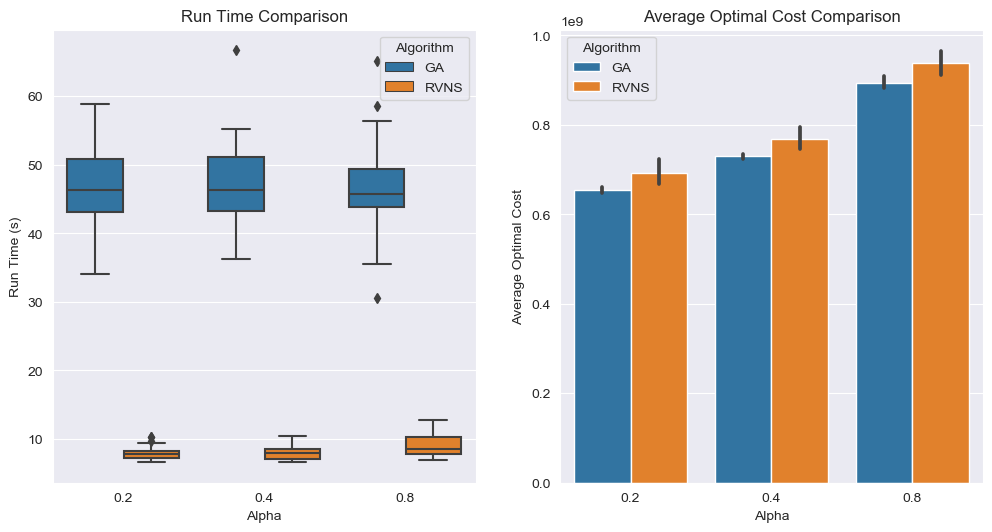

In [6]:
fig, axes = plt.subplots(1,2,figsize=(12,6))

sns.boxplot(x="Alpha", y="Run Time", data=run_time_df, hue = 'Algorithm',  ax = axes[0])
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('Run Time (s)')
axes[0].set_title('Run Time Comparison')

sns.barplot(x="Alpha", y="Optimal Cost", data=costs_df, hue = 'Algorithm',  ax = axes[1])
axes[1].set_xlabel('Alpha')
axes[1].set_ylabel('Average Optimal Cost')
axes[1].set_title('Average Optimal Cost Comparison')

##### Costs

(625296937.8077703, 1063005806.9154139)

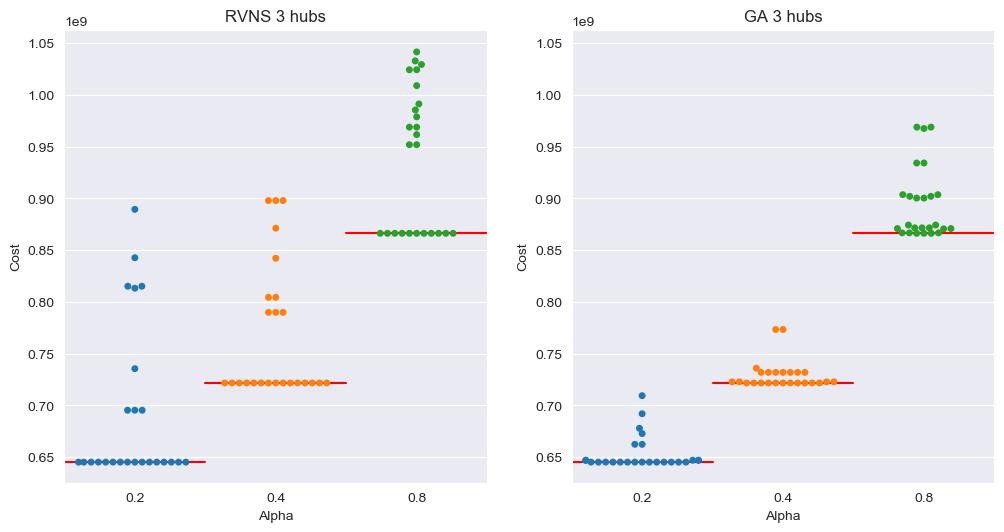

In [7]:
fig, axes = plt.subplots(1,2,figsize=(12,6))

sns.swarmplot(x="variable", y="value", data=pd.melt(rvns3_costs), ax = axes[0])
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('Cost')
axes[0].set_title('RVNS 3 hubs')
axes[0].axhline(y = 645192798.5, color = 'red', xmin = 0, xmax = 1/3)
axes[0].axhline(y = 721682063.7, color = 'red', xmin = 1/3, xmax = 2/3)
axes[0].axhline(y = 866284453.9, color = 'red', xmin = 2/3, xmax = 1)
ylims = axes[0].get_ylim()

sns.swarmplot(x="variable", y="value", data=pd.melt(ga3_costs), ax = axes[1])
axes[1].set_xlabel('Alpha')
axes[1].set_ylabel('Cost')
axes[1].set_title('GA 3 hubs')
axes[1].axhline(y = 645192798.5, color = 'red', xmin = 0, xmax = 1/3)
axes[1].axhline(y = 721682063.7, color = 'red', xmin = 1/3, xmax = 2/3)
axes[1].axhline(y = 866284453.9, color = 'red', xmin = 2/3, xmax = 1)
axes[1].set_ylim(ylims[0], ylims[1])